In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Crop_Data__train.csv')

In [3]:
df.shape

(164986, 25)

In [4]:
df.head()

,State,District,Lat,Long,GW_depth_Min,GW_depth_Max,Wells_depth_0_to_2,Wells_depth_2_to_5,Wells_depth_5_to_10,Wells_depth_10_to_20,...,Humidity,Temp_Max,Temp_Min,Dew_Frost_Point,Wind_Speed,Year,Season,Crop,Area,Production
0,KARNATAKA,BIDAR,14.54387,76.23089,3.65,20.30,0,4,7,6.0,...,62.022,31.448,19.958,16.594,3.268,2014,Whole Year,Coriander,76.0,26.0
1,ASSAM,SIVASAGAR,26.82490,94.17820,1.94,7.19,2,1,1,0.0,...,59.524,24.642,12.838,9.638,0.518,2001,Rabi,Urad,399.0,222.0
2,GUJARAT,VADODARA,22.27342,73.18848,3.05,37.90,0,4,17,10.0,...,79.024,31.816,24.144,23.304,2.984,2003,Kharif,Urad,13100.0,10700.0
3,RAJASTHAN,DUNGARPUR,23.68344,73.82284,2.44,20.60,0,4,6,7.0,...,48.312,33.668,20.010,12.087,2.317,2006,Whole Year,Guar seed,1799.0,45.0
4,ASSAM,TINSUKIA,27.47920,95.37184,0.14,4.90,1,5,2,0.0,...,62.027,30.314,19.018,15.793,0.290,2001,Whole Year,Potato,2605.0,16774.0


In [5]:
df.columns

Index(['State', 'District', 'Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max',
       'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above', 'Precipitation', 'Solar_Radiation',
       'Surface_Pressure', 'Humidity', 'Temp_Max', 'Temp_Min',
       'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
df_geo = df[['Lat', 'Long']].drop_duplicates()
df_geo

,Lat,Long
0,14.54387,76.23089
1,26.82490,94.17820
2,22.27342,73.18848
3,23.68344,73.82284
4,27.47920,95.37184
...,...,...
7844,23.84378,86.58455
8589,23.98138,84.22779
9419,23.67251,86.21064
13148,22.61547,86.38397


In [7]:
# Clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
silhouette_scores = []
inertia_scores = []
k_range = range(2, 20)
for k in k_range:
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(df_geo)
    preds = clusterer.predict(df_geo)
    centers = clusterer.cluster_centers_
    inertia_scores.append(clusterer.inertia_)
    silhouette_scores.append(silhouette_score(df_geo, preds))

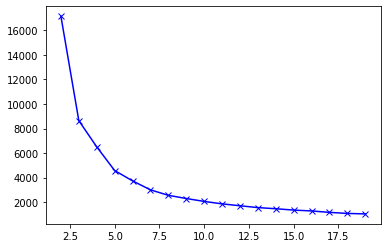

In [10]:
# Inertia vs k
plt.plot(k_range, inertia_scores, 'bx-')

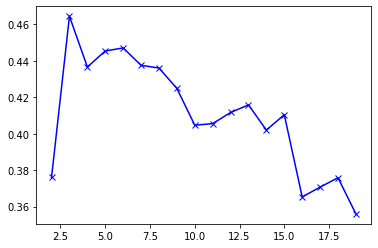

In [11]:
# Plot Silhoutte scores vs k
plt.plot(k_range, silhouette_scores, 'bx-')

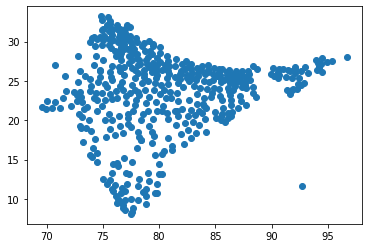

In [12]:
plt.scatter(df_geo.Long, df_geo.Lat)

In [13]:
# With 5 custers
clusterer_5 = KMeans(n_clusters=5)
clusterer_5.fit(df_geo)

KMeans(n_clusters=5)

In [14]:
preds_5 = clusterer_5.predict(df_geo)
preds_5.shape

(459,)

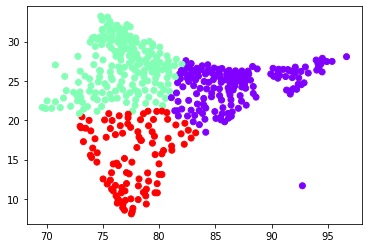

In [15]:
# With 3 clusters
clusterer_3 = KMeans(n_clusters=3)
clusterer_3.fit(df_geo)
preds_3 = clusterer_3.predict(df_geo)
plt.scatter(df_geo.Long, df_geo.Lat, c=preds_3, cmap='rainbow')

K=3 represents Northern, Southern and Eastern regions. But there are many practical differences within cluster regions such as, Rajasthan and J&K seems to represent same cluster but have totally different climate.

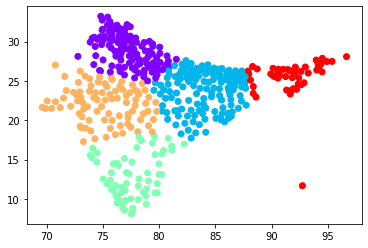

In [16]:
plt.scatter(df_geo.Long, df_geo.Lat, c=preds_5, cmap='rainbow')

K=5 represent some differences in cluster regions which can be differentiated based on extreme climate, coastal regions, etc.

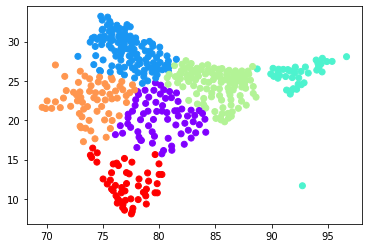

In [17]:
# With 6 clusters
clusterer_6 = KMeans(n_clusters=6)
clusterer_6.fit(df_geo)
preds_6 = clusterer_6.predict(df_geo)
plt.scatter(df_geo.Long, df_geo.Lat, c=preds_6, cmap='rainbow')

K=6 and K=5 do not represent much differences. But K=6 has higher Silhouette coefficient, hence may be considered during evaluation.

Looks like optimal number of clusters can be one of 3, 5 or 6.

In [18]:
import pickle

In [19]:
with open('./latlong_custerer_3.pkl', 'wb') as f:
        pickle.dump(clusterer_3, f)

In [20]:
with open('./latlong_custerer_5.pkl', 'wb') as f:
        pickle.dump(clusterer_5, f)

In [21]:
with open('./latlong_custerer_6.pkl', 'wb') as f:
        pickle.dump(clusterer_6, f)

In [26]:
x = clusterer_6.predict([[19.29546, 79.06321],[25.29546, 79.06321]])

In [35]:
str(x)

'[0 1]'